<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Predictive-Analytics-for-Finance" data-toc-modified-id="Predictive-Analytics-for-Finance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predictive Analytics for Finance</a></span><ul class="toc-item"><li><span><a href="#Structured-Data" data-toc-modified-id="Structured-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Structured Data</a></span><ul class="toc-item"><li><span><a href="#LSTM" data-toc-modified-id="LSTM-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>LSTM</a></span></li></ul></li></ul></li></ul></div>

# Predictive Analytics for Finance

In [1]:
import numpy as np
import pandas as pd
import re
import json
from pprint import pprint
from glob import glob
import itertools as it
import datetime as dt
import pickle
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

import feedparser
import urllib
from bs4 import BeautifulSoup as bs

import nltk
import konlpy as knlp
from konlpy.corpus import kolaw, kobill
from konlpy.tag import Hannanum, Kkma, Twitter

import soynlp
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer, MaxScoreTokenizer
from soynlp.noun import LRNounExtractor

import gensim

# Fonts
from matplotlib import font_manager, rc
font_fname = '/usr/share/fonts/truetype/nanum/NanumGothic_Coding.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

## Structured Data

In [2]:
kospi_data = pd.read_csv('kospi/kospi200_20170101_20171130.csv')
kospi_data

,Date,Open,High,Low,Close,Volume
0,2017-01-02,259.42,261.21,258.64,260.36,36913000
1,2017-01-03,261.55,263.00,260.72,262.97,61838000
2,2017-01-04,263.19,263.27,262.47,263.12,68765000
3,2017-01-05,262.88,262.94,261.64,261.98,78823000
4,2017-01-06,263.01,263.61,262.66,263.20,56571000
5,2017-01-09,263.83,264.55,263.34,263.74,59178000
6,2017-01-10,263.15,263.88,262.83,263.73,60748000
7,2017-01-11,264.24,268.91,264.18,268.15,76588000
8,2017-01-12,268.48,269.95,267.93,269.95,70686000
9,2017-01-13,268.34,268.68,267.66,267.91,61589000


In [3]:
kospi_data['Date'] = pd.to_datetime(kospi_data['Date'])
data = kospi_data.loc[kospi_data['Date'] >= dt.datetime(2017, 11, 1)]
data

,Date,Open,High,Low,Close,Volume
202,2017-11-01,335.67,338.76,335.60,338.76,93840000
203,2017-11-02,339.33,339.59,336.83,337.53,86219000
204,2017-11-03,339.08,339.12,336.16,338.83,75755000
205,2017-11-06,338.66,339.01,334.53,337.40,77983000
206,2017-11-07,337.23,338.35,336.00,336.76,114245000
207,2017-11-08,335.20,338.90,335.02,337.80,114008000
208,2017-11-09,338.55,338.59,334.99,337.14,108972000
209,2017-11-10,335.64,336.69,334.63,335.96,86246000
210,2017-11-13,336.63,337.34,333.73,334.33,91507000
211,2017-11-14,334.63,334.73,333.13,333.62,94187000


### LSTM

In [4]:
rng = np.random.RandomState(0)
n_samples = 100
n_features = 10

X = rng.normal(size=(n_samples, n_features))
X[:, :2] *= 1e300

In [16]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

ndim = 2
look_back = 1 

In [38]:
def preprocessor(filename, x_col=None, y_col=None, test_ratio=.5, look_back=1):
    
    ndimX = len(x_col)
    ndimY = len(y_col)
    
    # file loader
    pandf = pd.read_csv('kospi/kospi200_20100101_20171128.csv', index_col="Date")
 
    # convert nparray
    nparr_X = pandf[x_col].values[::-1].reshape(-1, ndimX)
    nparr_X.astype('float32')
    nparr_Y = pandf[y_col].values[::-1].reshape(-1, ndimY)
    nparr_Y.astype('float32') 

    # normalization
    scaler = MinMaxScaler(feature_range=(0, 1))
    nptf_X = scaler.fit_transform(nparr_X)
    nptf_Y = scaler.fit_transform(nparr_Y)
 
    # split train, test
    train_size = int(pandf.shape[0] * (1 - test_ratio))
    test_size = pandf.shape[0] - train_size
    
    trainX, testX = nptf_X[:train_size], nptf_X[train_size:]
    print('X :', len(trainX), len(testX))
    trainY, testY = nptf_Y[:train_size], nptf_Y[train_size:]
    print('Y :', len(trainY), len(testY))
    
    # reshape input to be [samples, time steps, features]
    trainX = trainX.reshape(trainX.shape[0], look_back, trainX.shape[1])
    testX = testX.reshape((testX.shape[0], look_back, testX.shape[1]))
 
    
    return scaler, trainX, trainY, testX, testY

In [65]:
scaler, trainX, trainY, testX, testY = preprocessor('/kospi200_20100101_20171128.csv', x_col=['Open', 'High', 'Low'], y_col=['Close'], test_ratio=.8, look_back=1)

X : 390 1565
Y : 390 1565


In [66]:
trainX[0], trainY[0]

(array([[ 0.93287309,  0.94054335,  0.93852065]]), array([ 0.94212314]))

In [69]:
trainY.shape

(390, 1)

In [71]:
ndim = trainX.shape[2]

# simple lstm network learning
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, ndim)))
model.add(Dense(trainY.shape[1]))
#model.add(Flatten())
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=2, verbose=2)

Epoch 1/10
 - 1s - loss: 0.3497
Epoch 2/10
 - 1s - loss: 0.0722
Epoch 3/10
 - 1s - loss: 0.0209
Epoch 4/10
 - 1s - loss: 0.0152
Epoch 5/10
 - 1s - loss: 0.0106
Epoch 6/10
 - 1s - loss: 0.0067
Epoch 7/10
 - 1s - loss: 0.0037
Epoch 8/10
 - 1s - loss: 0.0018
Epoch 9/10
 - 1s - loss: 8.4248e-04
Epoch 10/10
 - 1s - loss: 4.0529e-04


In [72]:
# make prediction
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Train Score: %.2f RMSE' % testScore)

Train Score: 5.64 RMSE


In [73]:
testX[0], testY[0]

(array([[ 0.33563455,  0.32823634,  0.34567354]]), array([ 248.69]))

Predict the Close value of final day
Predict:  [[ 234.0165863]]
Real: [ 223.49]


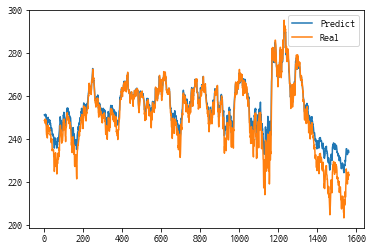

In [74]:
# predict last value (or tomorrow?)
lastX = testX[-1]
lastX = lastX.reshape((1, look_back, ndim))
lastY = model.predict(lastX)
lastY = scaler.inverse_transform(lastY)
print('Predict the Close value of final day')
print('Predict: ', lastY)  # 데이터 입력 마지막 다음날 종가 예측
print('Real:', testY[-1])
 
# plot
plt.plot(testPredict, label='Predict')
plt.plot(testY, label='Real')
plt.legend()
plt.show()

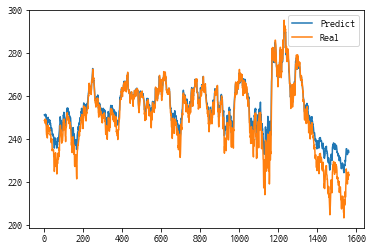

In [75]:
# plot
plt.plot(testPredict, label='Predict')
plt.plot(testY, label='Real')
plt.legend()
plt.show()

Done.